In [12]:
import pandas as pd
import ast
# intital exploration of the genres data

file_path = 'Merged_diversity_movies.csv'
df = pd.read_csv(file_path)

df['genres'] = df['genres'].apply(ast.literal_eval)

# Count the number of movies for each year
year_counts = df['year'].value_counts()

# Explode the genres list to count each genre separately
genre_counts = df.explode('genres')['genres'].value_counts()

# print(genre_counts)
# print((genre_counts))

print(year_counts)




2016    178
2014    177
2015    174
2011    152
2013    152
2018    152
2017    141
2012    129
2019    129
2008    123
2009    118
2010    117
2021     66
2022     64
2002     56
2007     54
2020     50
2005     48
2004     47
2006     45
2001     44
2003     42
2000     41
2023     23
Name: year, dtype: int64


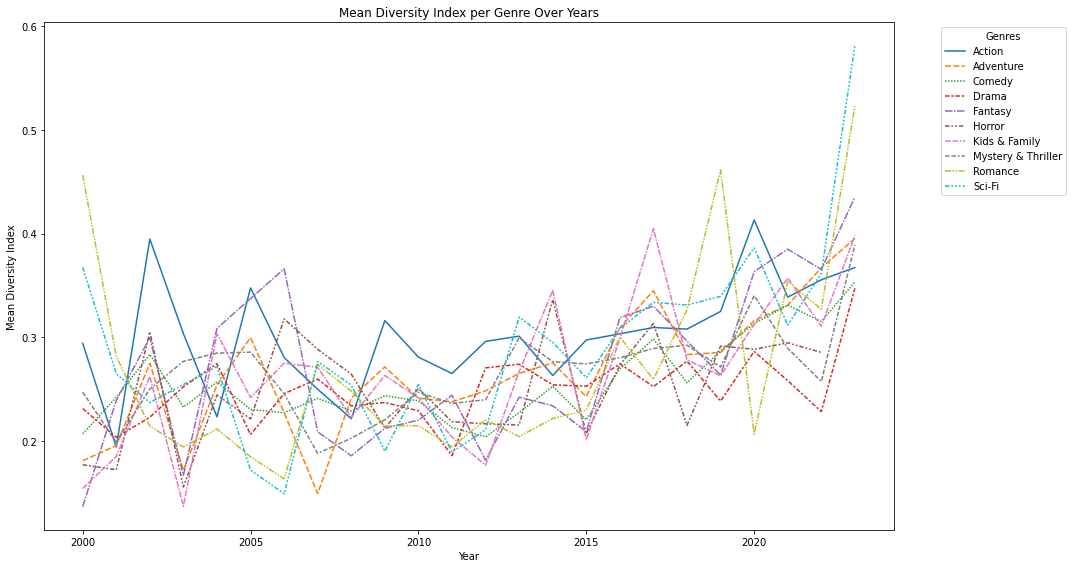

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the dataset
file_path = 'Merged_diversity_movies.csv'
df = pd.read_csv(file_path)

# Convert genres from string to list
df['genres'] = df['genres'].apply(ast.literal_eval)

# Explode genres
df_exploded = df.explode('genres')

# Filter top ten genres
top_genres = ['Drama', 'Comedy', 'Mystery & Thriller', 'Action', 'Adventure', 
              'Fantasy', 'Romance', 'Horror', 'Kids & Family', 'Sci-Fi']
df_filtered = df_exploded[df_exploded['genres'].isin(top_genres)]

# Group by year and genre, then calculate mean diversity index
diversity_by_year_genre = df_filtered.groupby(['year', 'genres'])['diversity_score'].mean().reset_index()

# Pivot for easier plotting
diversity_pivot = diversity_by_year_genre.pivot(index='year', columns='genres', values='diversity_score')

# Plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=diversity_pivot)
plt.title('Mean Diversity Index per Genre Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Diversity Index')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




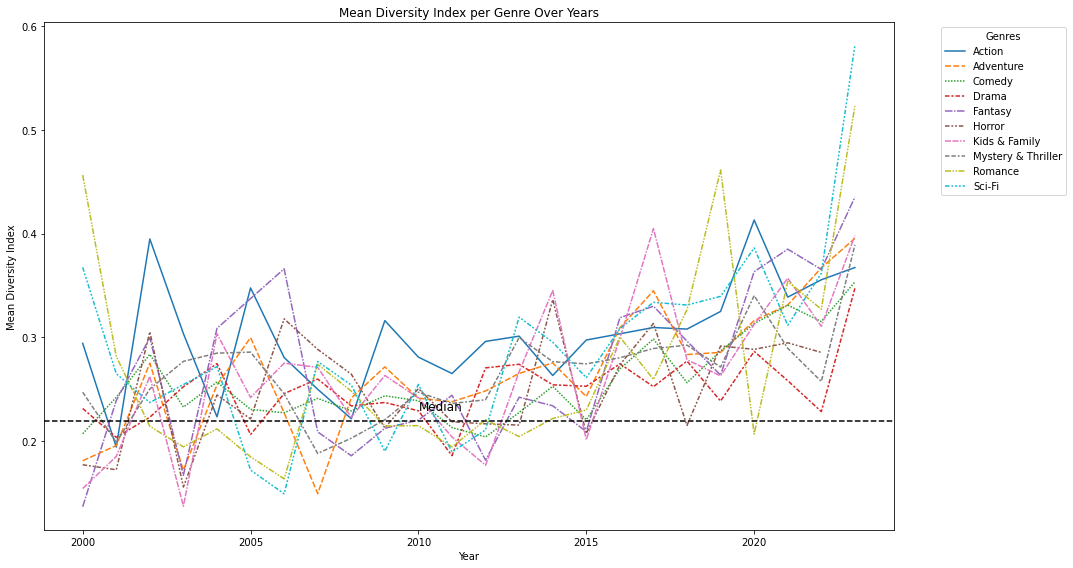

In [5]:
# create a graph for each one of them individually and have a line for median at 0.2576

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the dataset
file_path = 'Merged_diversity_movies.csv'
df = pd.read_csv(file_path)

# Convert genres from string to list
df['genres'] = df['genres'].apply(ast.literal_eval)

# Explode genres
df_exploded = df.explode('genres')

# Filter top ten genres
top_genres = ['Drama', 'Comedy', 'Mystery & Thriller', 'Action', 'Adventure', 
              'Fantasy', 'Romance', 'Horror', 'Kids & Family', 'Sci-Fi']
df_filtered = df_exploded[df_exploded['genres'].isin(top_genres)]

# Group by year and genre, then calculate mean diversity index
diversity_by_year_genre = df_filtered.groupby(['year', 'genres'])['diversity_score'].mean().reset_index()

# Pivot for easier plotting
diversity_pivot = diversity_by_year_genre.pivot(index='year', columns='genres', values='diversity_score')

# Plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=diversity_pivot)
plt.title('Mean Diversity Index per Genre Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Diversity Index')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add median line
median = df_filtered['diversity_score'].median()
plt.axhline(median, color='black', linestyle='--')
plt.text(2010, median+0.01, 'Median', fontsize=12)

plt.show()


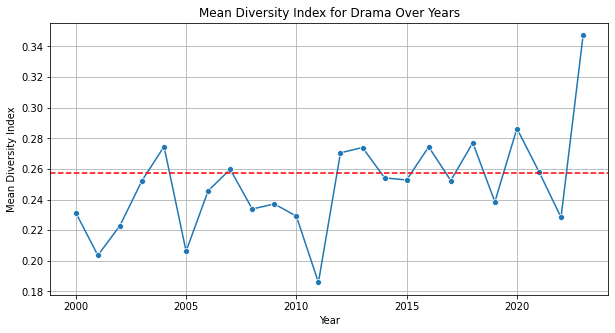

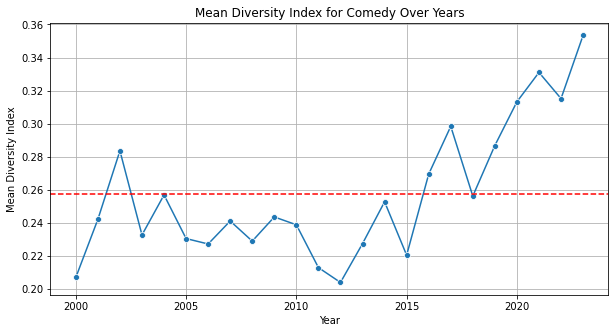

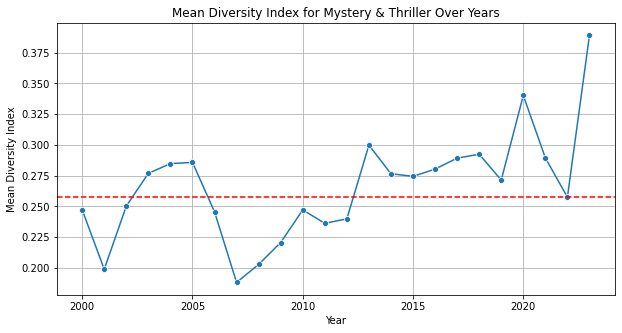

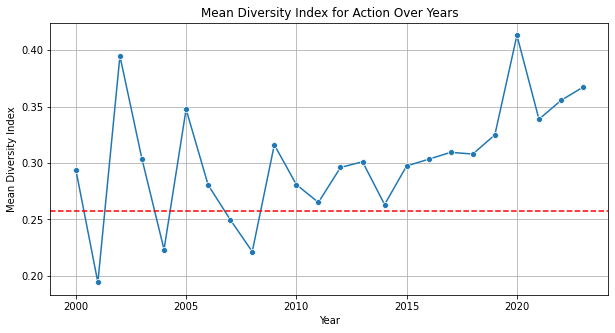

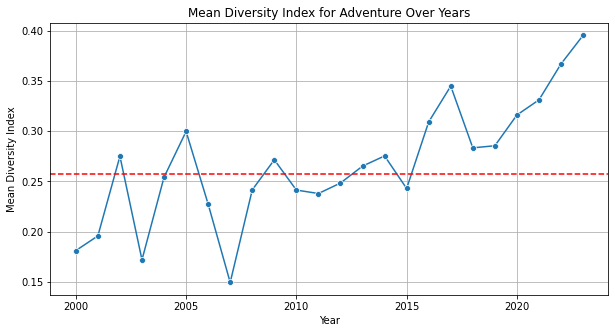

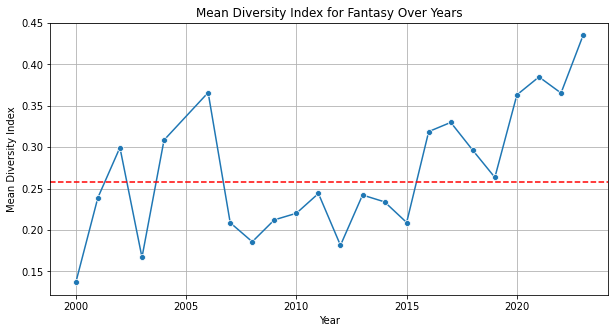

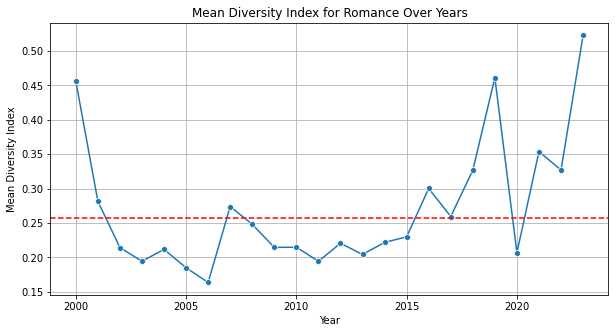

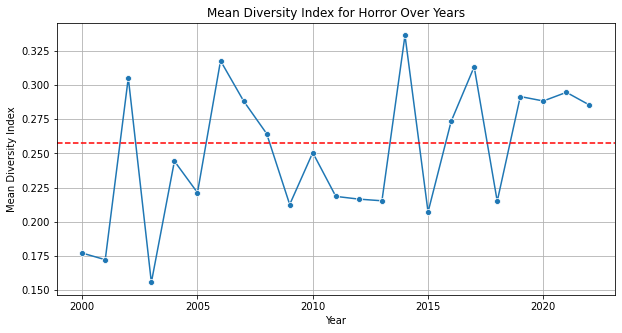

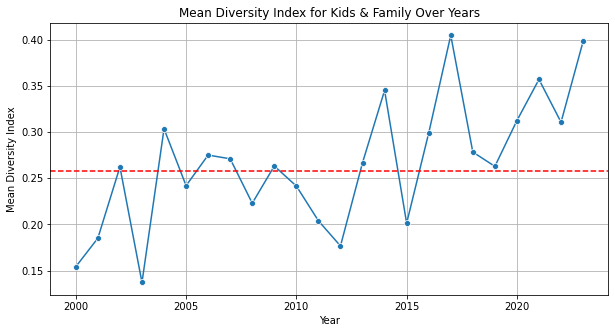

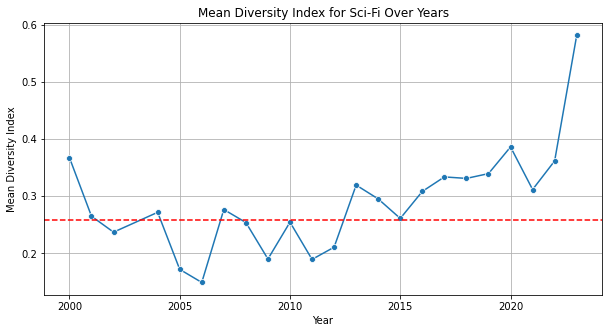

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the dataset
file_path = 'Merged_diversity_movies.csv'
df = pd.read_csv(file_path)

# Convert genres from string to list
df['genres'] = df['genres'].apply(ast.literal_eval)

# Explode genres
df_exploded = df.explode('genres')

# Filter top ten genres
top_genres = ['Drama', 'Comedy', 'Mystery & Thriller', 'Action', 'Adventure', 
              'Fantasy', 'Romance', 'Horror', 'Kids & Family', 'Sci-Fi']
df_filtered = df_exploded[df_exploded['genres'].isin(top_genres)]

# Calculate mean diversity index per year for each genre
diversity_by_year_genre = df_filtered.groupby(['year', 'genres'])['diversity_score'].mean().reset_index()

# Median diversity index value
median_diversity_index = 0.2576

# Plot individual graphs for each genre
for genre in top_genres:
    genre_data = diversity_by_year_genre[diversity_by_year_genre['genres'] == genre]
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='year', y='diversity_score', data=genre_data, marker='o')
    plt.axhline(y=median_diversity_index, color='r', linestyle='--')
    plt.title(f'Mean Diversity Index for {genre} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Diversity Index')
    plt.grid(True)
    plt.show()


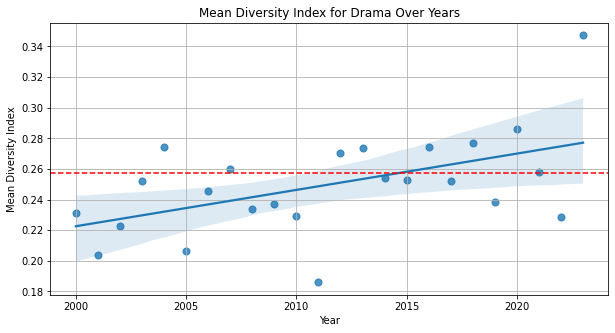

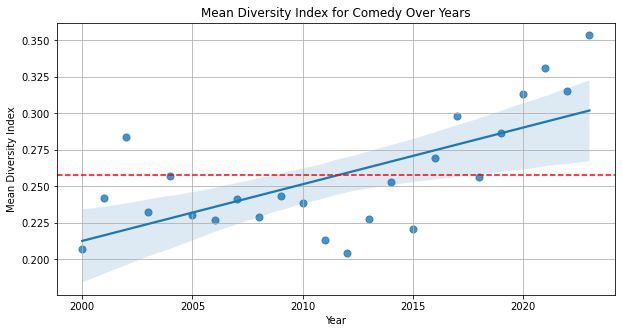

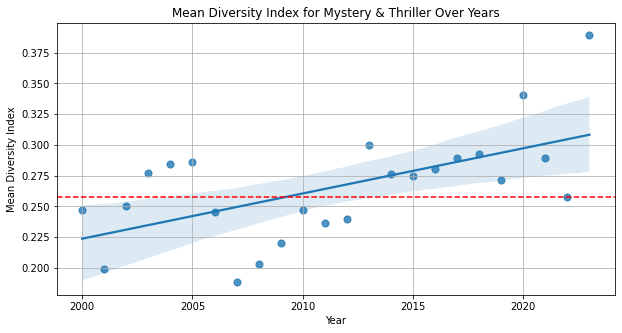

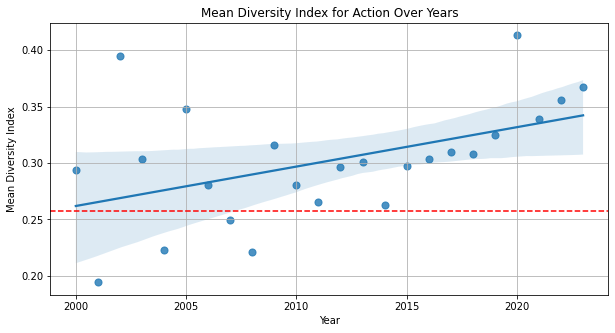

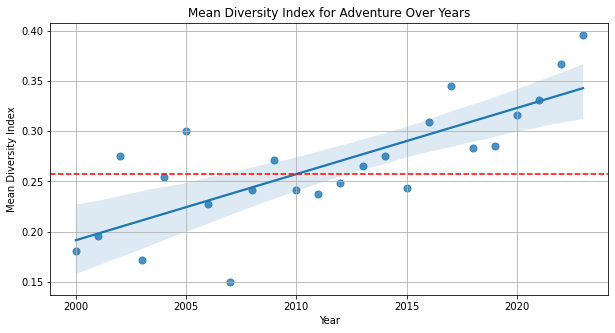

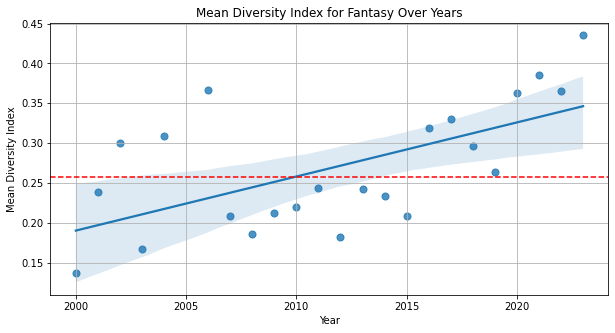

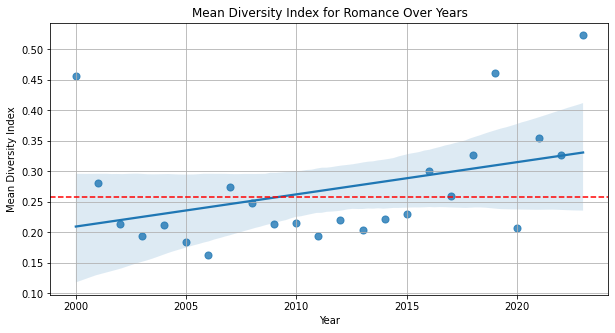

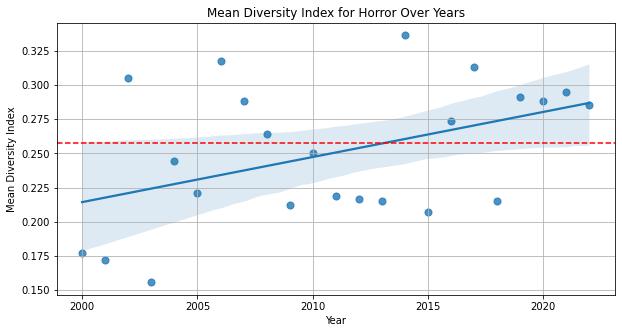

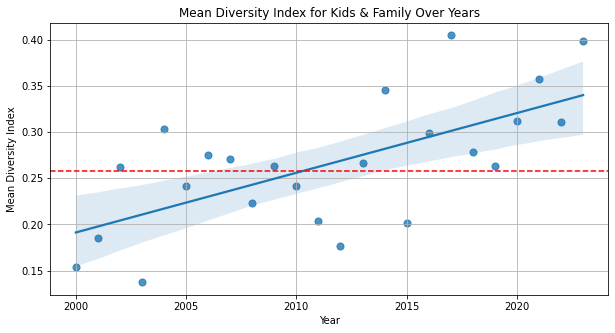

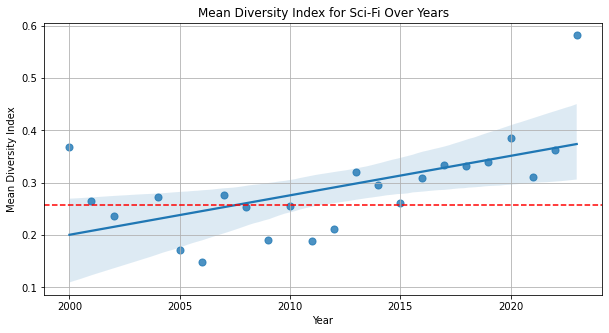

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Load the dataset
file_path = 'Merged_diversity_movies.csv'
df = pd.read_csv(file_path)

# Convert genres from string to list
df['genres'] = df['genres'].apply(ast.literal_eval)

# Explode genres
df_exploded = df.explode('genres')

# Filter top ten genres
top_genres = ['Drama', 'Comedy', 'Mystery & Thriller', 'Action', 'Adventure', 
              'Fantasy', 'Romance', 'Horror', 'Kids & Family', 'Sci-Fi']
df_filtered = df_exploded[df_exploded['genres'].isin(top_genres)]

# Calculate mean diversity index per year for each genre
diversity_by_year_genre = df_filtered.groupby(['year', 'genres'])['diversity_score'].mean().reset_index()

# Median diversity index value
median_diversity_index = 0.2576

# Plot individual graphs with a line of best fit for each genre
for genre in top_genres:
    genre_data = diversity_by_year_genre[diversity_by_year_genre['genres'] == genre]
    plt.figure(figsize=(10, 5))
    sns.regplot(x='year', y='diversity_score', data=genre_data, marker='o', scatter_kws={'s':50})
    plt.axhline(y=median_diversity_index, color='r', linestyle='--')
    plt.title(f'Mean Diversity Index for {genre} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Diversity Index')
    plt.grid(True)
    plt.show()


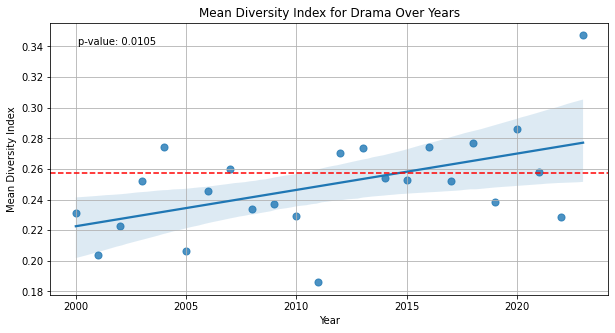

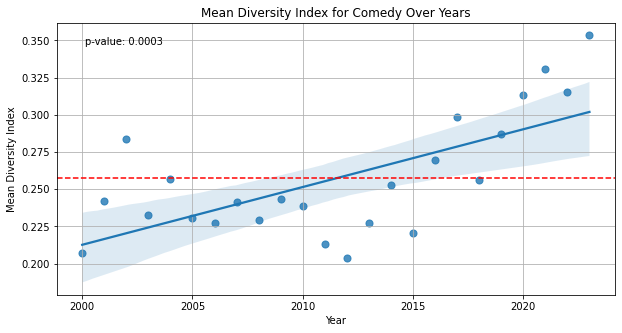

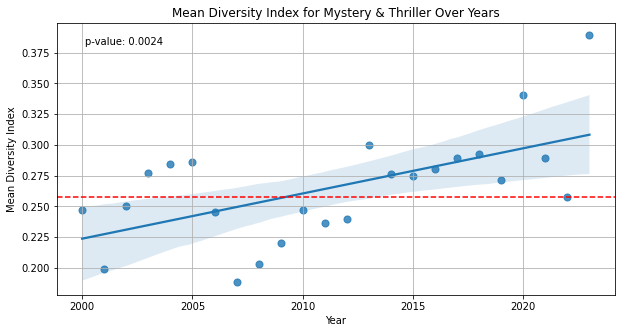

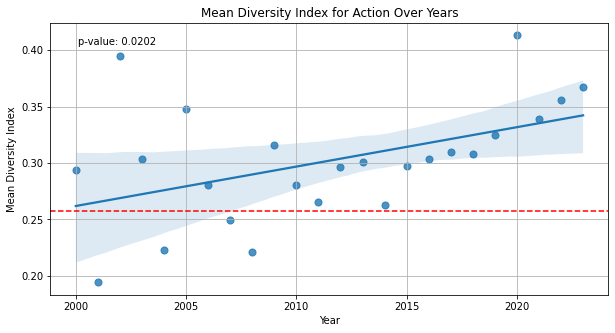

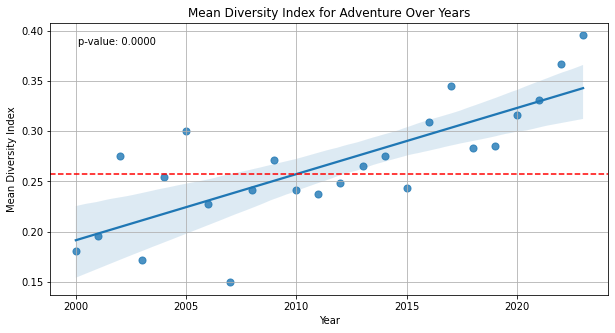

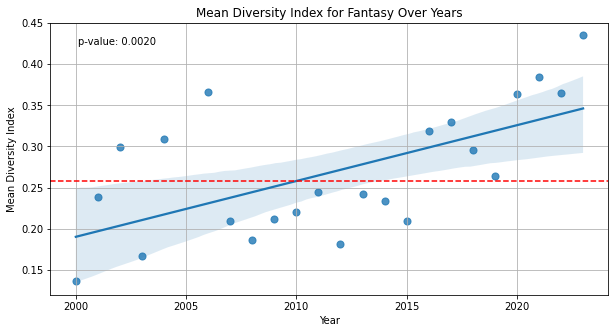

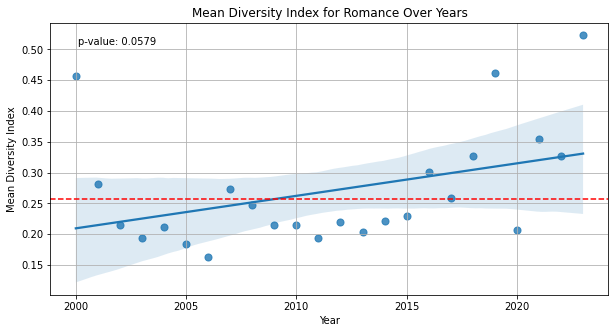

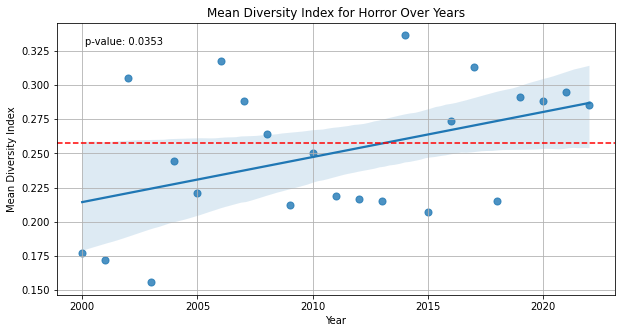

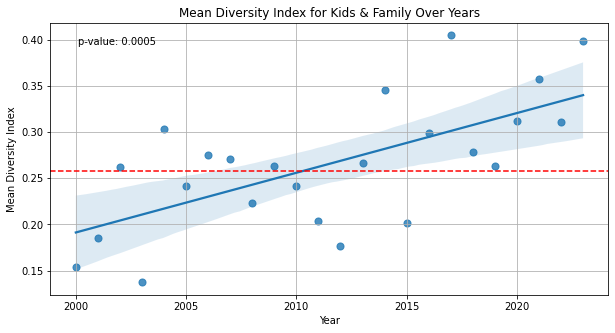

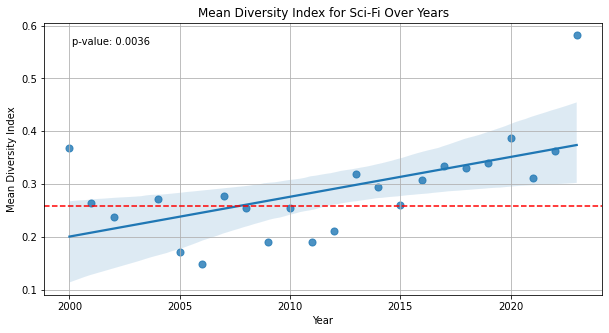

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import statsmodels.api as sm

# Load the dataset
file_path = 'Merged_diversity_movies.csv'
df = pd.read_csv(file_path)

# Convert genres from string to list
df['genres'] = df['genres'].apply(ast.literal_eval)

# Explode genres
df_exploded = df.explode('genres')

# Filter top ten genres
top_genres = ['Drama', 'Comedy', 'Mystery & Thriller', 'Action', 'Adventure', 
              'Fantasy', 'Romance', 'Horror', 'Kids & Family', 'Sci-Fi']
df_filtered = df_exploded[df_exploded['genres'].isin(top_genres)]

# Calculate mean diversity index per year for each genre
diversity_by_year_genre = df_filtered.groupby(['year', 'genres'])['diversity_score'].mean().reset_index()

# Median diversity index value
median_diversity_index = 0.2576

# Plot individual graphs with a line of best fit for each genre and print p-value
for genre in top_genres:
    genre_data = diversity_by_year_genre[diversity_by_year_genre['genres'] == genre]

    # Perform linear regression
    X = sm.add_constant(genre_data['year']) # adding a constant
    model = sm.OLS(genre_data['diversity_score'], X).fit()
    p_value = model.pvalues[1]  # p-value for the slope

    # Plot
    plt.figure(figsize=(10, 5))
    sns.regplot(x='year', y='diversity_score', data=genre_data, marker='o', scatter_kws={'s':50})
    plt.axhline(y=median_diversity_index, color='r', linestyle='--')
    plt.title(f'Mean Diversity Index for {genre} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Diversity Index')
    plt.text(x=0.05, y=0.95, s=f'p-value: {p_value:.4f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top')
    plt.grid(True)
    plt.show()


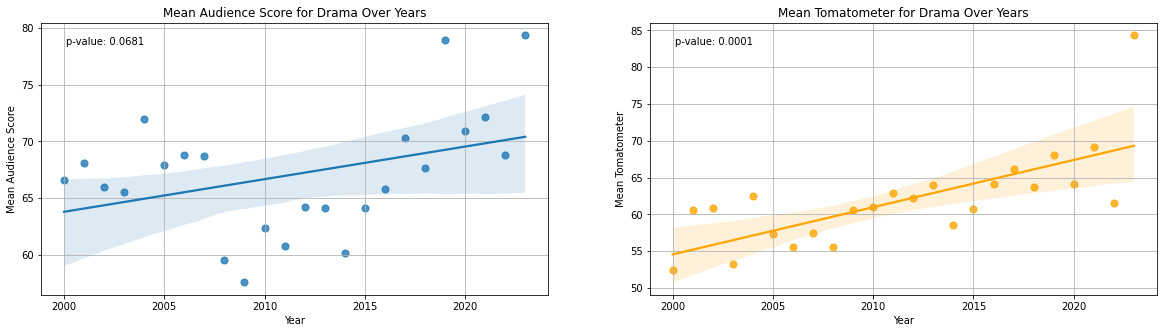

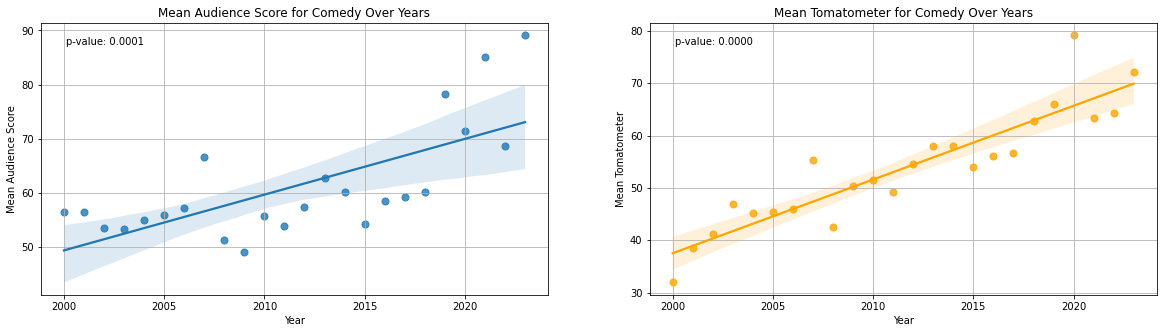

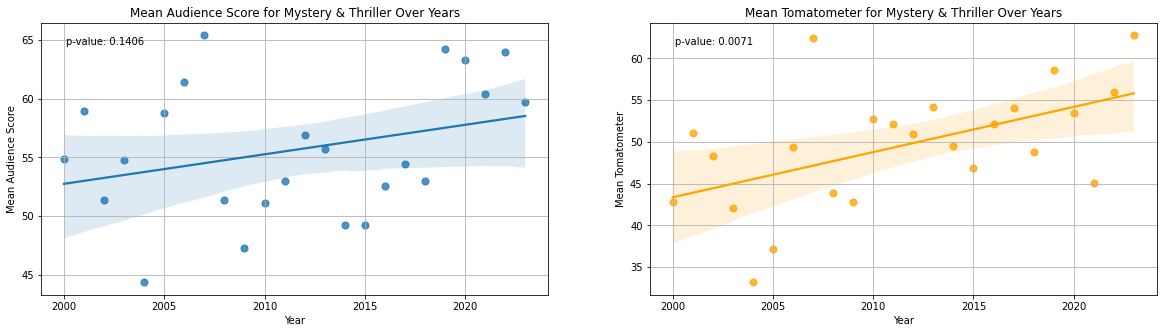

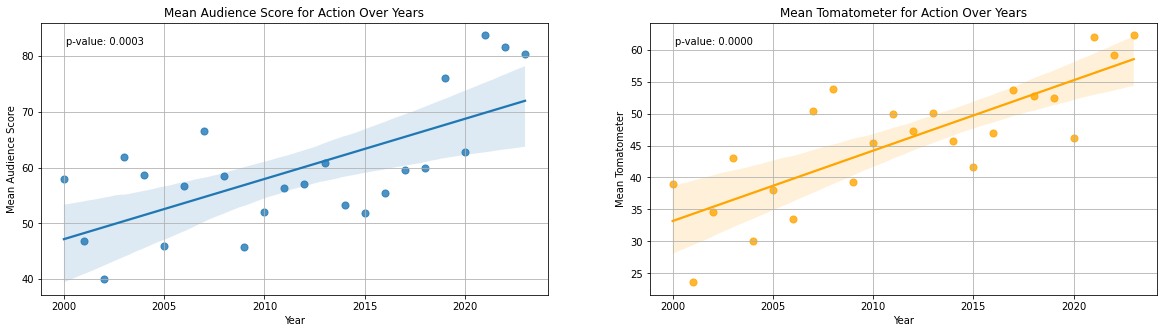

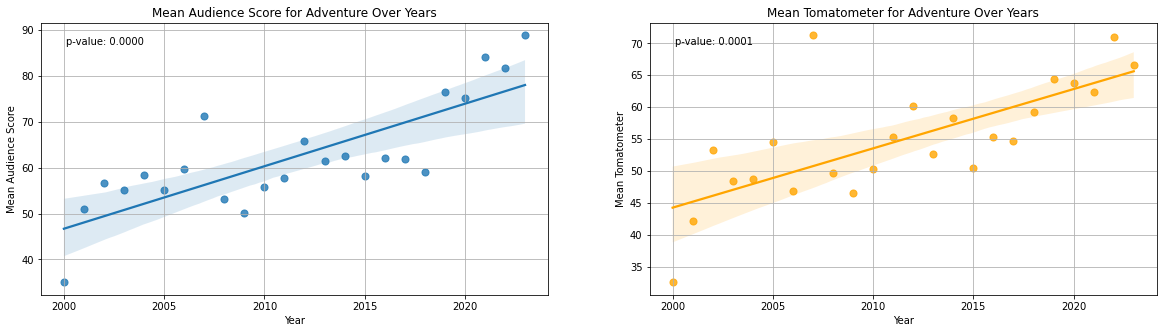

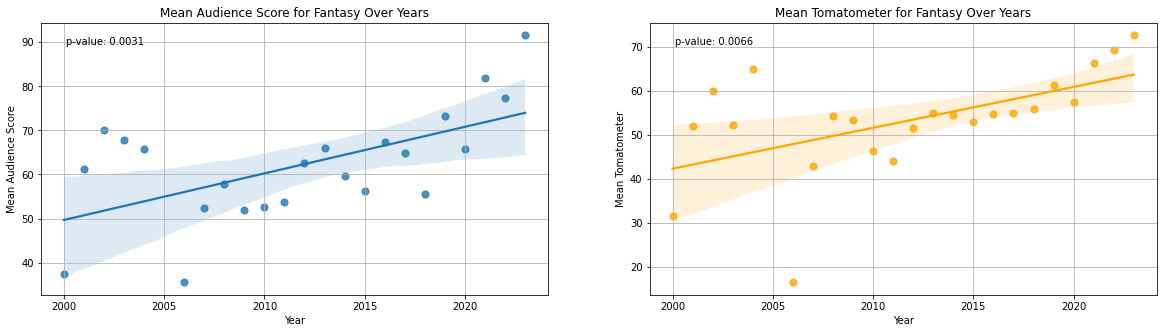

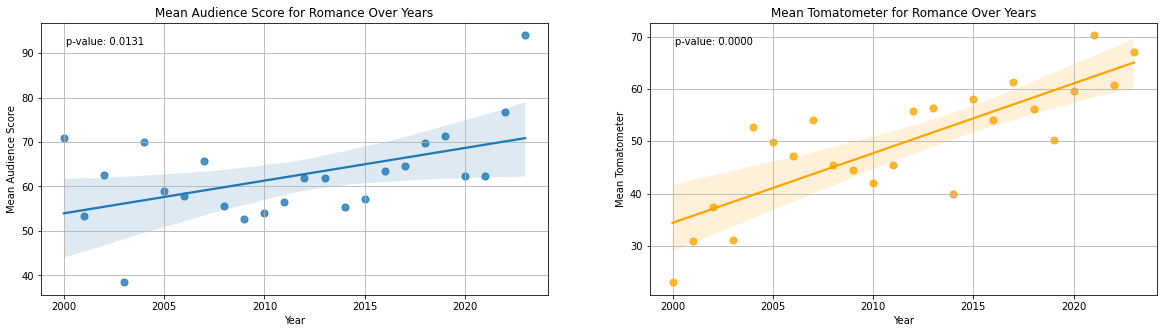

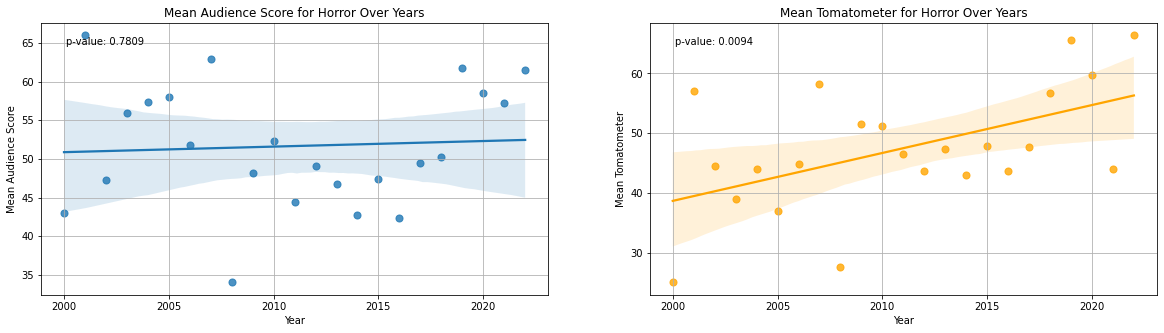

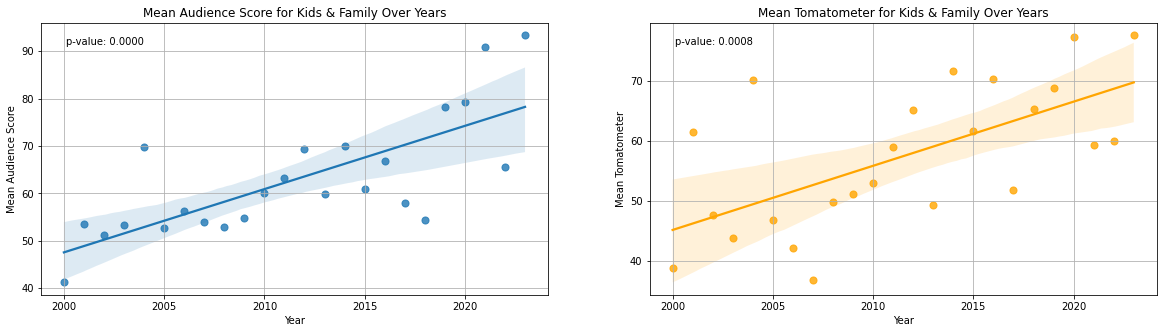

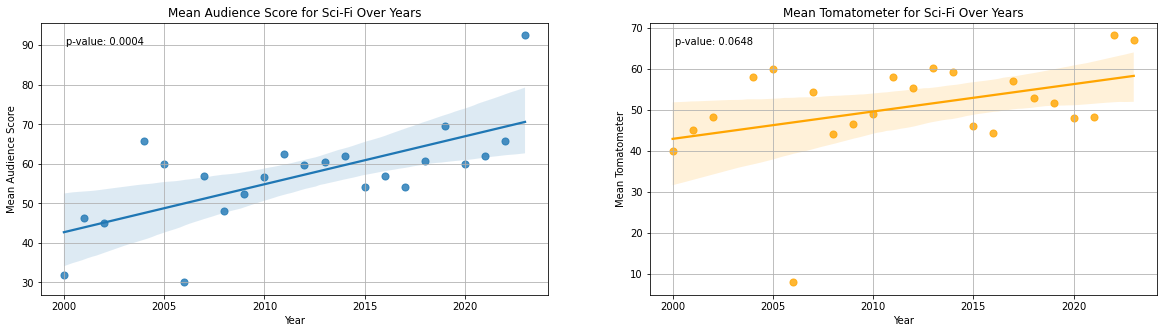

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import statsmodels.api as sm

# Load the dataset
file_path = 'Merged_diversity_movies.csv'
df = pd.read_csv(file_path)

# Convert genres from string to list
df['genres'] = df['genres'].apply(ast.literal_eval)

# Explode genres
df_exploded = df.explode('genres')

# Filter top ten genres
top_genres = ['Drama', 'Comedy', 'Mystery & Thriller', 'Action', 'Adventure', 
              'Fantasy', 'Romance', 'Horror', 'Kids & Family', 'Sci-Fi']
df_filtered = df_exploded[df_exploded['genres'].isin(top_genres)]

# Calculate mean diversity index per year for each genre
# Calculate mean diversity index per year for each genre for both audience score and tomatometer
diversity_by_year_genre_both = df_filtered.groupby(['year', 'genres'])[['audience_score', 'tomatometer']].mean().reset_index()

# Plot individual graphs with a line of best fit for each genre for both audience score and tomatometer
for genre in top_genres:
    genre_data = diversity_by_year_genre_both[diversity_by_year_genre_both['genres'] == genre]

    # Perform linear regression for audience score
    X_audience = sm.add_constant(genre_data['year']) # adding a constant
    model_audience = sm.OLS(genre_data['audience_score'], X_audience).fit()
    p_value_audience = model_audience.pvalues[1]  # p-value for the slope

    # Perform linear regression for tomatometer
    X_tomatometer = sm.add_constant(genre_data['year'])
    model_tomatometer = sm.OLS(genre_data['tomatometer'], X_tomatometer).fit()
    p_value_tomatometer = model_tomatometer.pvalues[1]

    # Plotting
    plt.figure(figsize=(20, 5))

    # Audience Score
    plt.subplot(1, 2, 1)
    sns.regplot(x='year', y='audience_score', data=genre_data, marker='o', scatter_kws={'s':50})
    plt.title(f'Mean Audience Score for {genre} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Audience Score')
    plt.text(x=0.05, y=0.95, s=f'p-value: {p_value_audience:.4f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top')
    plt.grid(True)

    # Tomatometer
    plt.subplot(1, 2, 2)
    sns.regplot(x='year', y='tomatometer', data=genre_data, marker='o', scatter_kws={'s':50}, color='orange')
    plt.title(f'Mean Tomatometer for {genre} Over Years')
    plt.xlabel('Year')
    plt.ylabel('Mean Tomatometer')
    plt.text(x=0.05, y=0.95, s=f'p-value: {p_value_tomatometer:.4f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top')
    plt.grid(True)

    plt.show()

